#Likelihood of Social Media Presence by Region of Farmers' Market

### Have you ever wondered which part of the U.S. leverages Social Media for local farmers' market sales more or less? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

%matplotlib inline

import statsmodels.api as sm

In [3]:
#import the file and check the first and last rows

markets = pd.read_csv("../GA-DAT-LA-07-Project/Export-5.csv")
markets = markets.replace(np.nan,' ',regex=True) 
markets.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1000618,100-Mile Market,http://www.peoplesfoodco-op.org/,,,,,507 Harrison Street,Kalamazoo,Kalamazoo,...,Y,N,Y,N,N,Y,N,N,Y,4/24/2014 18:22
1,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,,,,,106 S. Main Street,Six Mile,,...,,,,,,,,,,2013
2,1010691,10th Steet Community Farmers Market,,,,,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49
3,1002454,112st Madison Avenue,,,,,,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38
4,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,Y,N,Y,N,Y,Y,Y,N,N,5/1/2015 10:40


In [4]:
# What data do I have to analyze?

markets.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'region',
       'Season1Date', 'Season1Time', 'Season2Date', 'Season2Time',
       'Season3Date', 'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y',
       'Location', 'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic',
       'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs',
       'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts',
       'Plants', 'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee',
       'Beans', 'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

In [5]:
# Create a function to determine when social media information is provided.  Interpretation of this information is 
# the farmers' market actively uses its social media if they chose to share the information in the USDA directory

def social(row):
    if (row['Facebook'] == " ") and (row['Twitter'] == ' ') and (row['Youtube'] == ' ') and (row['OtherMedia'] == ' '):
        return '0'
    return '1'

In [6]:
markets['SocialMedia'] = markets.apply(lambda row: social (row),axis=1)
markets.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,SocialMedia
0,1000618,100-Mile Market,http://www.peoplesfoodco-op.org/,,,,,507 Harrison Street,Kalamazoo,Kalamazoo,...,N,Y,N,N,Y,N,N,Y,4/24/2014 18:22,0
1,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,,,,,106 S. Main Street,Six Mile,,...,,,,,,,,,2013,0
2,1010691,10th Steet Community Farmers Market,,,,,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,Y,N,N,N,N,N,N,10/28/2014 9:49,1
3,1002454,112st Madison Avenue,,,,,,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,3/1/2012 10:38,0
4,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,N,Y,N,Y,Y,Y,N,N,5/1/2015 10:40,1


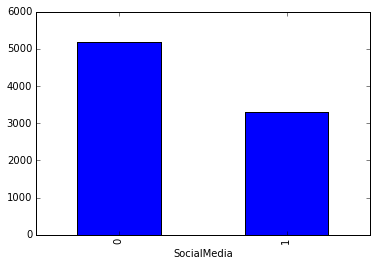

In [7]:
CountbySocial = markets.groupby(markets['SocialMedia'])['FMID'].count()
CountbySocial.plot(kind='bar')

In [8]:
from sklearn.cross_validation import train_test_split

# Create the train and test sets
X = markets[['SocialMedia']].values
y = markets.State.ravel()

# create 80%-20% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

print("Shape of Training Sets")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print()

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y) 
train_score = neigh.score(X_train,y_train)
cv_score = neigh.score(X_test,y_test)

print("Most Likely State without Social Media for Farmers' Markets: ", neigh.predict([[0]]))
print("Most Likely State with Social Media for Farmers' Markets: ", neigh.predict([[1]]))
print()
print("Predicted Probabilities: ",neigh.predict_proba([[3000]]))  
print()
print("Train Score: ",train_score)  
print("CV Score: ",cv_score)  

Shape of Training Sets
X_train:  (6780, 1)
y_train:  (6780,)

Most Likely State without Social Media for Farmers' Markets:  ['Nevada']
Most Likely State with Social Media for Farmers' Markets:  ['North Carolina']

Predicted Probabilities:  [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Train Score:  0.0174041297935
CV Score:  0.0153301886792
